# Image Analysis

This Jupyter Notebook processes the necessary files `A` and `B` generated from various processing scripts in various phases of the pipeline. The result of this notebook when executed will result in the generation of `Figure 3` as described in the paper.

Figure 3 in the paper contains 2 separate subfigures which are enumerated below:
- 3(a): Wordcloud of ALT text in Images found in the Notebooks
- 3(b): Histogram showing the classification of the images in the notebooks.

## Required Libraries:

- `json`
- `matplotlib`
- `pandas`
- `seaborn`
- `wordcloud`

In [1]:
import json
import matplotlib
import matplotlib.pyplot as plt
import pandas
import seaborn as sns
from wordcloud import WordCloud


matplotlib.rcParams.update({'font.size': 20, 'pdf.fonttype': 42, 'ps.fonttype': 42})

## Figure 3(a): Wordcloud of ALT text in images found in the notebooks

In [2]:
alt = ''
df = pandas.read_csv('data_out/nb_processed_cell_html.csv', converters={'alt_text': json.loads})

In [3]:
for word in df['alt_text'].tolist():
    if len(word) <= 0:
        continue
    alt = alt + " ".join(word)

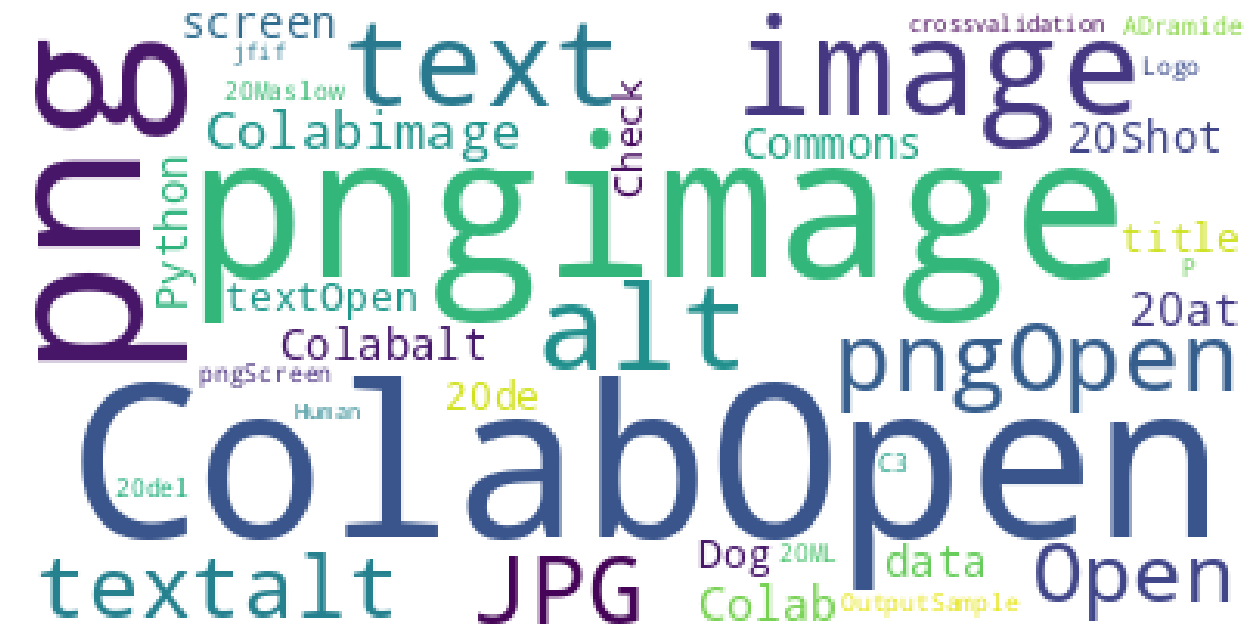

In [4]:
altCloud = WordCloud(background_color="white", max_words=200, contour_width=3, collocations = False, contour_color='steelblue')
altCloud.generate(alt)
altcloud_svg = altCloud.to_svg(embed_font=True)

f = open('plot_out/fig-3a-alt-text-wordcloud.svg', 'w')
f.write(altcloud_svg)
f.close()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
plt.imshow(altCloud)
plt.axis("off")
plt.savefig('plot_out/fig-3a-alt-text-wordcloud.pdf', bbox_inches='tight')

| WARNING: &#x1F4A1; Please Note that every execution of the above script will generate a different visual output  but will contain the same insights |
| --- |


**Figure 3(a)** presents a word cloud of the alt text descriptions present in the notebooks which mostly contain words that are not helpful to screen reader users such as the word `image`, `alt`, or `png`. The words Colab and Open also occur at high frequencies dominating the word cloud's central display.

-----

## Figure 3(b): Classification of Images used in the notebooks

In [5]:
# Load the model results file which is the output of the FC-CNN+FV-CNN Classification

model_results = pandas.read_csv('./data_out/model-results.csv')
model_results

,Name,NotebookName,Category
0,data-100k/base64Images/00014130779110127e4663c...,data-100k/base64Images/00014130779110127e4663c...,Bar plots
1,data-100k/base64Images/00014130779110127e4663c...,data-100k/base64Images/00014130779110127e4663c...,Area chart
2,data-100k/base64Images/00014130779110127e4663c...,data-100k/base64Images/00014130779110127e4663c...,Line Chart
3,data-100k/base64Images/00014130779110127e4663c...,data-100k/base64Images/00014130779110127e4663c...,Line Chart
4,data-100k/base64Images/00014130779110127e4663c...,data-100k/base64Images/00014130779110127e4663c...,Bubble Chart
...,...,...,...
340713,data-100k/base64Images/fffd4c1669082d48e561ce5...,data-100k/base64Images/fffd4c1669082d48e561ce5...,Line Chart
340714,data-100k/base64Images/fffd885a4df5d69c9f709a2...,data-100k/base64Images/fffd885a4df5d69c9f709a2...,Line Chart
340715,data-100k/base64Images/fffe21dde7d18843cef438c...,data-100k/base64Images/fffe21dde7d18843cef438c...,Area chart
340716,data-100k/base64Images/fffe21dde7d18843cef438c...,data-100k/base64Images/fffe21dde7d18843cef438c...,Confusion matrix


In [6]:
category_counts = model_results['Category'].value_counts().to_dict()
category_count_data = [[k, v] for k, v in category_counts.items()]

category_df = pandas.DataFrame(data=category_count_data, columns=['Type of Chart', 'Number of Images'])
category_df['p'] = category_df['Number of Images'] / category_df['Number of Images'].sum() * 100.0
category_df['psum'] = category_df['p'].cumsum()
category_df

,Type of Chart,Number of Images,p,psum
0,Line Chart,75874,22.268856,22.268856
1,Histogram,42970,12.611603,34.880458
2,Box plot,32229,9.459142,44.339600
3,Confusion matrix,30502,8.952271,53.291872
4,Scatter plot,28619,8.399615,61.691487
5,Area chart,23966,7.033969,68.725456
6,Natural images,20565,6.035783,74.761240
7,Bar plots,17436,5.117428,79.878668
8,Bubble Chart,15796,4.636092,84.514760
9,Heat map,7576,2.223540,86.738300


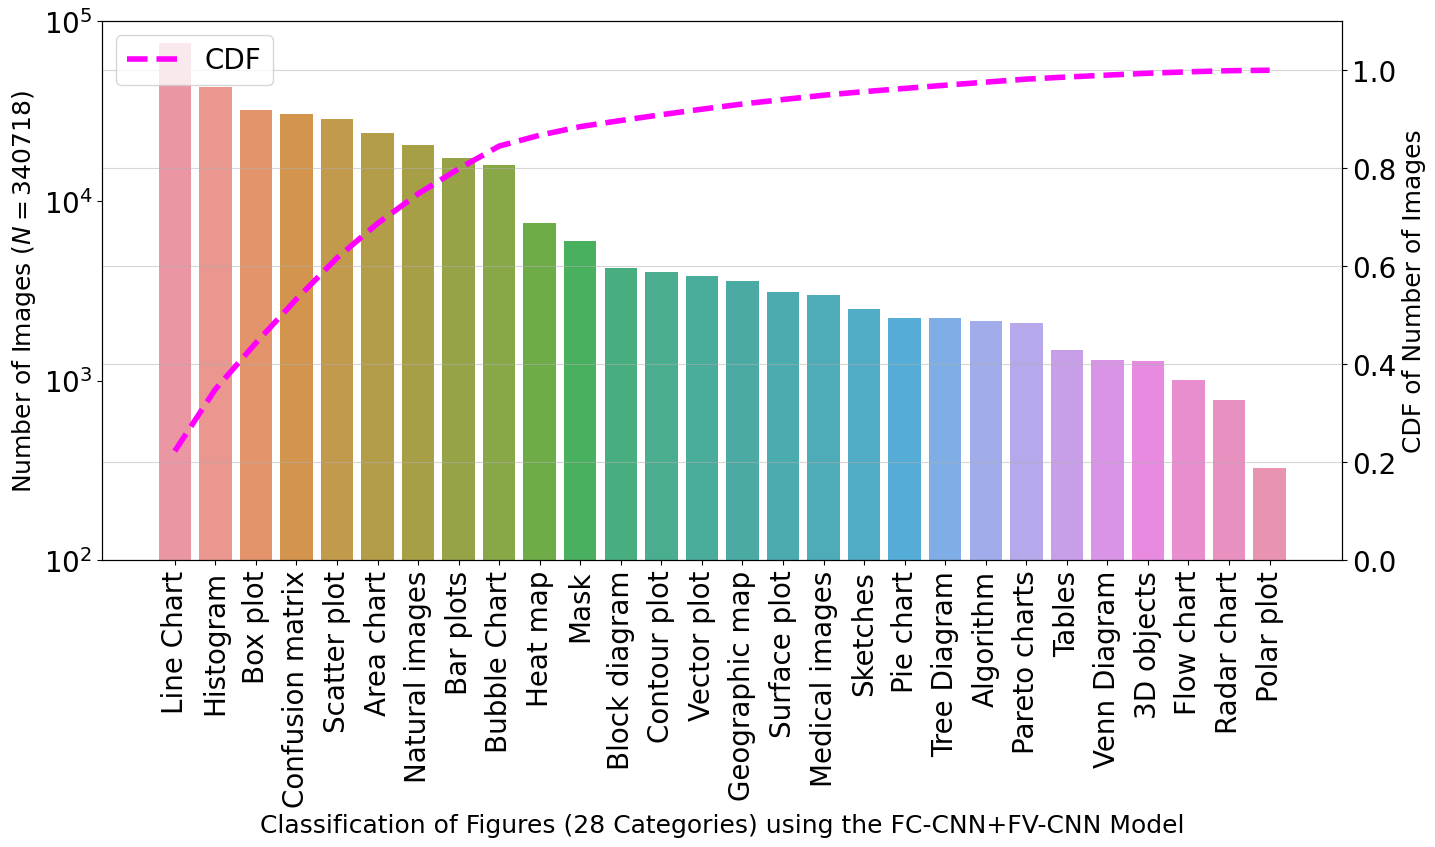

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 7))
ax2 = ax.twinx()

total_images = category_df['Number of Images'].sum()
num_categories = len(set(category_df['Type of Chart'].tolist()))
category_df['cumsum'] = category_df['Number of Images'].cumsum() / total_images

sns.barplot(data=category_df, x="Type of Chart", y="Number of Images", ax=ax)
sns.lineplot(data=category_df, x="Type of Chart", color='magenta', y="cumsum", label='CDF', linewidth=4, linestyle='--', ax=ax2)
ax.set_xlabel(f'Classification of Figures ({num_categories} Categories) using the FC-CNN+FV-CNN Model', fontsize=18)
ax.set_ylabel(f'Number of Images $(N={total_images})$', fontsize=18)
ax.set_yscale('symlog')
ax2.set_ylabel(f'CDF of Number of Images', fontsize=18)
ax2.grid(True, alpha=0.5)
ax2.set(ylim=(0, 1.1))
ax.set(ylim=(100, 100000))
ax2.legend()
ax.tick_params(axis='x', rotation=90)
plt.savefig(f'./plot_out/fig-3b-image_classification_with_cdf.pdf', bbox_inches='tight')

**Figure 3(b)** is a histogram whose x axis contains the categories of classification of images in the dataset after inference through the FC-CNN+FV-CNN model, and y axis represents the total counts of images over a log scale. The sum of all vertical bars indicating different categories ranked in descending order of usage popularity result in the total 340718 images. The figure contains an alternate y axis to the right side of the graph indicating the CDF of the number of images over all categories. Over 75 percentage of the images are classified into 7 types (Line chart, histogram, box plot, confusion matrix, scatter plot, area chart, and natural images).

----